In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/elsevier/Bert-NER'
%cd $path
import utils_train
import utils_annotate
import os
!pip install highlight-text
import matplotlib.pyplot as plt
from highlight_text import HighlightText

Mounted at /content/drive
/content/drive/MyDrive/elsevier/Bert-NER


In [2]:
file_list = os.listdir('individual_ner/')
print(len(file_list))
file_list

32


['10.1016j.flatc.2022.100347.json',
 '10.1016j.apmt.2020.100685.json',
 '10.1016j.carbon.2021.10.059.json',
 '10.1016j.cpc.2020.107583.json',
 '10.1016j.jnucmat.2023.154794.json',
 '10.1016j.commatsci.2023.112388.json',
 '10.1016j.cartre.2023.100260.json',
 '10.1016j.jallcom.2023.169964.json',
 '10.1016j.commatsci.2023.112526.json',
 '10.1016j.ssi.2023.116358.json',
 '10.1016j.apmt.2023.101951.json',
 '10.1016j.commatsci.2022.111970.json',
 '10.1016j.commatsci.2023.112656.json',
 '10.1016j.commatsci.2022.111330.json',
 '10.1016j.tsf.2021.138927.json',
 '10.1016j.ijheatmasstransfer.2022.122859.json',
 '10.1016j.cpc.2021.108218.json',
 '10.1016j.commatsci.2021.110364.json',
 '10.1016j.commatsci.2023.112376.json',
 '10.1016j.flatc.2022.100446.json',
 '10.1016j.commatsci.2021.110960.json',
 '10.1016j.commatsci.2019.109333.json',
 '10.1016j.commatsci.2023.112655.json',
 '10.1016j.commatsci.2023.112723.json',
 '10.1016j.cpc.2023.108920.json',
 '10.1016j.ssi.2023.116298.json',
 '10.1016j.ijhe

In [3]:
record = file_list[-1]
print(record)
file = f'individual_ner/{record}'
data = utils_annotate.load_json(file)

10.1016j.commatsci.2019.04.025.json


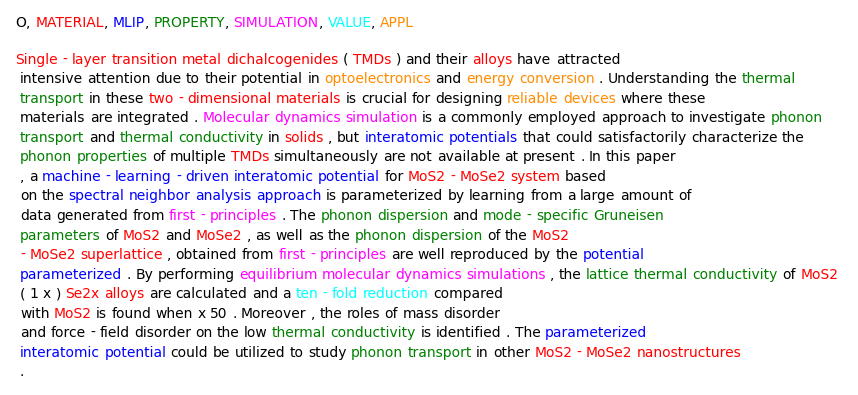

In [ ]:
colors = {'O': 'black', 'MATERIAL': 'red', 'MLIP': 'blue', 'PROPERTY': 'green',
          'SIMULATION': 'magenta', 'VALUE': 'cyan', 'APPL': 'darkorange'}
word_list_marked = ['<' + w + '>' for w in data['words']]
markers = [{"color": colors[i]} for i in data['ner']]
j = 0
for i in range(len(data['words'])):
    if (i + 1) % 15 == 0:
        word_list_marked.insert(i + j, '\n')
        j += 1
fig, ax = plt.subplots()
ax.set_axis_off()
HighlightText(x=0., y=1, s='<O>, <MATERIAL>, <MLIP>, <PROPERTY>, <SIMULATION>, <VALUE>, <APPL>',
              highlight_textprops=[{"color": c} for c in list(colors.values())], ax=ax)
HighlightText(x=0., y=0.9, s=' '.join(word_list_marked),
              highlight_textprops=markers, ax=ax)
plt.show()

In [ ]:
new_rec, new_rec4check = utils_annotate.revise(file,
 [207, 208, 210, 211, 212, 213], 'O', overwrite=True)

In [4]:
rec = utils_annotate.check(file)
print(rec)

[(0, 'Single', 'MATERIAL'), (1, '-', 'MATERIAL'), (2, 'layer', 'MATERIAL'), (3, 'transition', 'MATERIAL'), (4, 'metal', 'MATERIAL'), (5, 'dichalcogenides', 'MATERIAL'), (6, '(', 'O'), (7, 'TMDs', 'MATERIAL'), (8, ')', 'O'), (9, 'and', 'O'), (10, 'their', 'O'), (11, 'alloys', 'MATERIAL'), (12, 'have', 'O'), (13, 'attracted', 'O'), (14, 'intensive', 'O'), (15, 'attention', 'O'), (16, 'due', 'O'), (17, 'to', 'O'), (18, 'their', 'O'), (19, 'potential', 'O'), (20, 'in', 'O'), (21, 'optoelectronics', 'APPL'), (22, 'and', 'O'), (23, 'energy', 'APPL'), (24, 'conversion', 'APPL'), (25, '.', 'O'), (26, 'Understanding', 'O'), (27, 'the', 'O'), (28, 'thermal', 'PROPERTY'), (29, 'transport', 'PROPERTY'), (30, 'in', 'O'), (31, 'these', 'O'), (32, 'two', 'MATERIAL'), (33, '-', 'MATERIAL'), (34, 'dimensional', 'MATERIAL'), (35, 'materials', 'MATERIAL'), (36, 'is', 'O'), (37, 'crucial', 'O'), (38, 'for', 'O'), (39, 'designing', 'O'), (40, 'reliable', 'APPL'), (41, 'devices', 'APPL'), (42, 'where', 'O')

In [ ]:
word_list, categories = utils_annotate.reannotate(file, ['O', 'MATERIAL', 'MLIP', 'PROPERTY', 'SIMULATION'])